# Analyzing the type of housing construction in Highest or High Resource areas of Los Angeles
### Making a case for the lack of, and need for affordable housing production to be directed to high opportunity neighborhoods

In [1]:
# importing geospatial libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# read and add shapefile to notebook using url
# tried using shp file but didnt work- ask q
url = "https://www.treasurer.ca.gov/ctcac/opportunity/2023/final_2023_shapefile.zip"
TCAC = gpd.read_file(url)



In [3]:
#data type
type(TCAC)

geopandas.geodataframe.GeoDataFrame

In [4]:
# checking out the data
TCAC.head()

fips fips_bg  cnty_nm countyd           region   ecn_dmn   env_hl_  \
0  06001400100    None  Alameda   06001  Bay Area Region  0.796927  0.927856   
1  06001400200    None  Alameda   06001  Bay Area Region  0.960588  0.627255   
2  06001400300    None  Alameda   06001  Bay Area Region  0.927188  0.619238   
3  06001400400    None  Alameda   06001  Bay Area Region  0.872411  0.657983   
4  06001400500    None  Alameda   06001  Bay Area Region  0.759519  0.698063   

    ed_domn     index            oppcat  \
0  0.787575  0.590095  Highest Resource   
1  0.810955  0.701320  Highest Resource   
2  0.324649  0.210942     High Resource   
3  0.523046  0.358539     High Resource   
4  0.566466  0.310218     High Resource   

                                            geometry  
0  POLYGON ((-122.23418 37.85254, -122.23428 37.8...  
1  POLYGON ((-122.25253 37.85110, -122.25094 37.8...  
2  POLYGON ((-122.26417 37.83787, -122.26427 37.8...  
3  POLYGON ((-122.26081 37.84869, -122.26023 37.8...  
4  POLYGON ((-122.26023 37.85274, -122.26081 37.8...

In [5]:
# no. of rows and columns
TCAC.shape

(10136, 11)

In [6]:
TCAC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [7]:
TCAC.dtypes

fips          object
fips_bg       object
cnty_nm       object
countyd       object
region        object
ecn_dmn      float64
env_hl_      float64
ed_domn      float64
index        float64
oppcat        object
geometry    geometry
dtype: object

In [8]:
TCAC.columns.to_list()

['fips',
 'fips_bg',
 'cnty_nm',
 'countyd',
 'region',
 'ecn_dmn',
 'env_hl_',
 'ed_domn',
 'index',
 'oppcat',
 'geometry']

In [9]:
#seeing only county names
TCAC['cnty_nm'].sample(5)

4464         Merced
378          Amador
9550         Sutter
3722    Los Angeles
8765    Santa Clara
Name: cnty_nm, dtype: object

In [10]:
# listing counties 
TCAC['cnty_nm'].value_counts()

Los Angeles        2365
San Diego           685
Orange              583
Riverside           509
San Bernardino      472
Santa Clara         378
Alameda             361
Sacramento          335
Fresno              315
Kern                235
Contra Costa        213
Sonoma              197
San Francisco       196
Ventura             195
Butte               195
Tulare              174
San Joaquin         174
San Mateo           172
Stanislaus          159
Monterey            141
Placer              137
Shasta              131
San Luis Obispo     118
Santa Barbara       117
Solano              112
Humboldt            108
Merced               98
El Dorado            92
Santa Cruz           89
Mendocino            79
Nevada               75
Imperial             70
Marin                67
Napa                 63
Sutter               62
Madera               59
Kings                57
Yolo                 51
Yuba                 49
Lake                 48
Tuolumne             48
Tehama          

In [11]:
#saving it as a variable
TCAC_county = TCAC['cnty_nm'].value_counts()
TCAC_county

Los Angeles        2365
San Diego           685
Orange              583
Riverside           509
San Bernardino      472
Santa Clara         378
Alameda             361
Sacramento          335
Fresno              315
Kern                235
Contra Costa        213
Sonoma              197
San Francisco       196
Ventura             195
Butte               195
Tulare              174
San Joaquin         174
San Mateo           172
Stanislaus          159
Monterey            141
Placer              137
Shasta              131
San Luis Obispo     118
Santa Barbara       117
Solano              112
Humboldt            108
Merced               98
El Dorado            92
Santa Cruz           89
Mendocino            79
Nevada               75
Imperial             70
Marin                67
Napa                 63
Sutter               62
Madera               59
Kings                57
Yolo                 51
Yuba                 49
Lake                 48
Tuolumne             48
Tehama          

In [12]:
type(TCAC_county)

pandas.core.series.Series

In [13]:
#changing type of data
TCAC_county = TCAC_county.reset_index()

In [14]:
type(TCAC_county)

pandas.core.frame.DataFrame

In [15]:
#trimming data
TCAC.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fips      10136 non-null  object  
 1   fips_bg   3093 non-null   object  
 2   cnty_nm   10136 non-null  object  
 3   countyd   10136 non-null  object  
 4   region    10136 non-null  object  
 5   ecn_dmn   9747 non-null   float64 
 6   env_hl_   9747 non-null   float64 
 7   ed_domn   9747 non-null   float64 
 8   index     9233 non-null   float64 
 9   oppcat    9747 non-null   object  
 10  geometry  10133 non-null  geometry
dtypes: float64(4), geometry(1), object(6)
memory usage: 871.2+ KB


In [16]:
#showing desired columns of county name, opportunity and geometry
TCAC[['fips','cnty_nm','oppcat','geometry']]

fips  cnty_nm             oppcat  \
0      06001400100  Alameda   Highest Resource   
1      06001400200  Alameda   Highest Resource   
2      06001400300  Alameda      High Resource   
3      06001400400  Alameda      High Resource   
4      06001400500  Alameda      High Resource   
...            ...      ...                ...   
10131  06115041000     Yuba               None   
10132  06115041100     Yuba  Moderate Resource   
10133  06115041100     Yuba   Highest Resource   
10134  06115041100     Yuba  Moderate Resource   
10135  06115041100     Yuba               None   

                                                geometry  
0      POLYGON ((-122.23418 37.85254, -122.23428 37.8...  
1      POLYGON ((-122.25253 37.85110, -122.25094 37.8...  
2      POLYGON ((-122.26417 37.83787, -122.26427 37.8...  
3      POLYGON ((-122.26081 37.84869, -122.26023 37.8...  
4      POLYGON ((-122.26023 37.85274, -122.26081 37.8...  
...                                                  ...  
10131  POLYGON ((-121.63631 39.24941, -121.63581 39.2...  
10132  POLYGON ((-121.27892 39.49773, -121.27724 39.5...  
10133  POLYGON ((-121.32330 39.36354, -121.32129 39.3...  
10134  POLYGON ((-121.28387 39.46216, -121.27864 39.4...  
10135  POLYGON ((-121.37257 39.37358, -121.37048 39.3...  

[10136 rows x 4 columns]

In [17]:
#creating a list of desired columns
desired_columns =['fips','cnty_nm','oppcat','geometry']
desired_columns

['fips', 'cnty_nm', 'oppcat', 'geometry']

In [18]:
#trimming data to the 3 desired columns and creating a new dataset
TCAC_cleared = TCAC[desired_columns].copy()
TCAC_cleared

fips  cnty_nm             oppcat  \
0      06001400100  Alameda   Highest Resource   
1      06001400200  Alameda   Highest Resource   
2      06001400300  Alameda      High Resource   
3      06001400400  Alameda      High Resource   
4      06001400500  Alameda      High Resource   
...            ...      ...                ...   
10131  06115041000     Yuba               None   
10132  06115041100     Yuba  Moderate Resource   
10133  06115041100     Yuba   Highest Resource   
10134  06115041100     Yuba  Moderate Resource   
10135  06115041100     Yuba               None   

                                                geometry  
0      POLYGON ((-122.23418 37.85254, -122.23428 37.8...  
1      POLYGON ((-122.25253 37.85110, -122.25094 37.8...  
2      POLYGON ((-122.26417 37.83787, -122.26427 37.8...  
3      POLYGON ((-122.26081 37.84869, -122.26023 37.8...  
4      POLYGON ((-122.26023 37.85274, -122.26081 37.8...  
...                                                  ...  
10131  POLYGON ((-121.63631 39.24941, -121.63581 39.2...  
10132  POLYGON ((-121.27892 39.49773, -121.27724 39.5...  
10133  POLYGON ((-121.32330 39.36354, -121.32129 39.3...  
10134  POLYGON ((-121.28387 39.46216, -121.27864 39.4...  
10135  POLYGON ((-121.37257 39.37358, -121.37048 39.3...  

[10136 rows x 4 columns]

In [19]:
#filtering to show only los angeles county data
TCAC_cleared.loc[TCAC_cleared['cnty_nm'] == 'Los Angeles']
LA = TCAC_cleared.loc[TCAC_cleared['cnty_nm'] == 'Los Angeles']

In [20]:
LA

fips      cnty_nm             oppcat  \
1858  06037101110  Los Angeles  Moderate Resource   
1859  06037101122  Los Angeles      High Resource   
1860  06037101210  Los Angeles  Moderate Resource   
1861  06037101220  Los Angeles  Moderate Resource   
1862  06037101300  Los Angeles      High Resource   
...           ...          ...                ...   
4218  06037980030  Los Angeles               None   
4219  06037980031  Los Angeles               None   
4220  06037980033  Los Angeles               None   
4221  06037990200  Los Angeles               None   
4222  06037990300  Los Angeles               None   

                                               geometry  
1858  POLYGON ((-118.28862 34.25591, -118.29104 34.2...  
1859  POLYGON ((-118.27728 34.26196, -118.27742 34.2...  
1860  POLYGON ((-118.28862 34.24861, -118.28968 34.2...  
1861  POLYGON ((-118.27802 34.24961, -118.27712 34.2...  
1862  POLYGON ((-118.27728 34.25991, -118.26529 34.2...  
...                                                 ...  
4218  POLYGON ((-118.43001 33.91677, -118.42991 33.9...  
4219  POLYGON ((-118.26359 33.70463, -118.27475 33.7...  
4220  POLYGON ((-118.18207 33.72302, -118.20623 33.7...  
4221  POLYGON ((-118.41149 33.79360, -118.41142 33.7...  
4222  POLYGON ((-118.23194 33.71062, -118.25869 33.7...  

[2365 rows x 4 columns]

In [21]:
LA["geometry"]

1858    POLYGON ((-118.28862 34.25591, -118.29104 34.2...
1859    POLYGON ((-118.27728 34.26196, -118.27742 34.2...
1860    POLYGON ((-118.28862 34.24861, -118.28968 34.2...
1861    POLYGON ((-118.27802 34.24961, -118.27712 34.2...
1862    POLYGON ((-118.27728 34.25991, -118.26529 34.2...
                              ...                        
4218    POLYGON ((-118.43001 33.91677, -118.42991 33.9...
4219    POLYGON ((-118.26359 33.70463, -118.27475 33.7...
4220    POLYGON ((-118.18207 33.72302, -118.20623 33.7...
4221    POLYGON ((-118.41149 33.79360, -118.41142 33.7...
4222    POLYGON ((-118.23194 33.71062, -118.25869 33.7...
Name: geometry, Length: 2365, dtype: geometry

In [22]:
type(LA)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

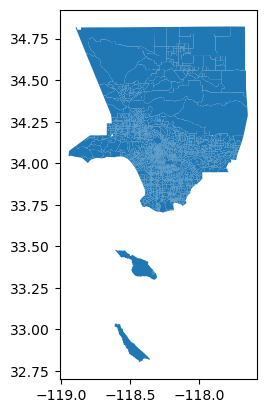

In [23]:
#plotting only LA county
LA.plot()

<AxesSubplot: >

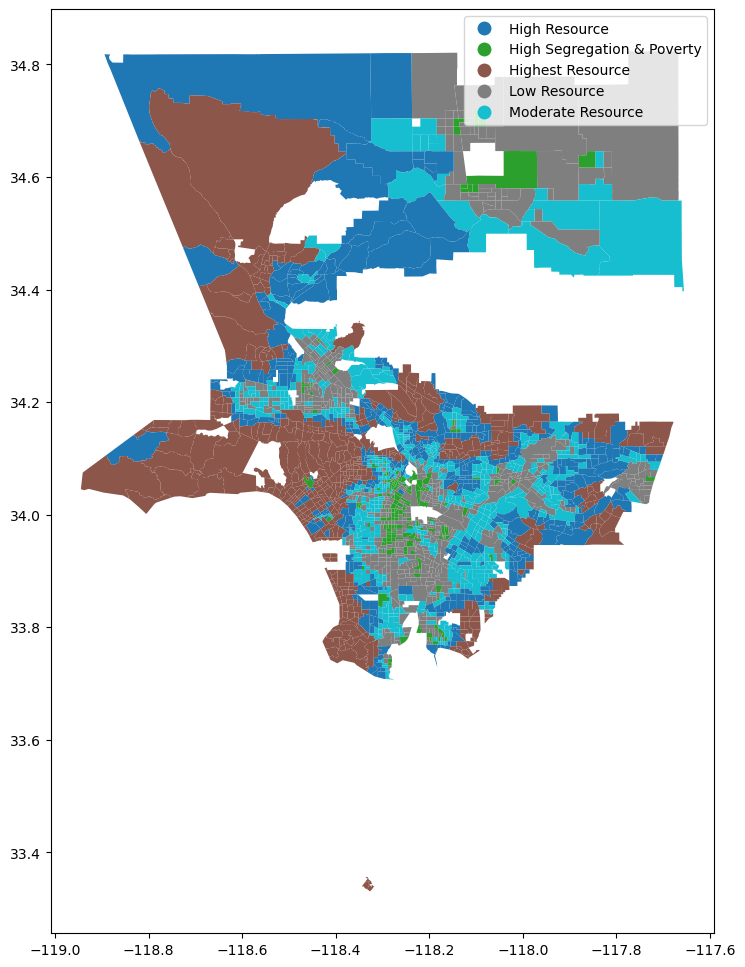

In [24]:
#adding colour to the plot
LA.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default). WHAT ARE THE DIMENSION UNITS?
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1), 
            }                  # this puts the legend to the side
    
) 

In [25]:
zipfile = "data/City_Boundary.zip"
cityofla = gpd.read_file(zipfile)

In [26]:
cityofla.head

<bound method NDFrame.head of    OBJECTID CITY                                           geometry
0         1   IN  POLYGON ((-118.42000 34.32917, -118.41948 34.3...>

In [27]:
citytracts = cityofla.overlay(LA, how='intersection')

In [28]:
#now let's see if that worked
citytracts.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1152 non-null   int64   
 1   CITY      1152 non-null   object  
 2   fips      1152 non-null   object  
 3   cnty_nm   1152 non-null   object  
 4   oppcat    1124 non-null   object  
 5   geometry  1152 non-null   geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 54.1+ KB


In [29]:
#checking the coordinate system
citytracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

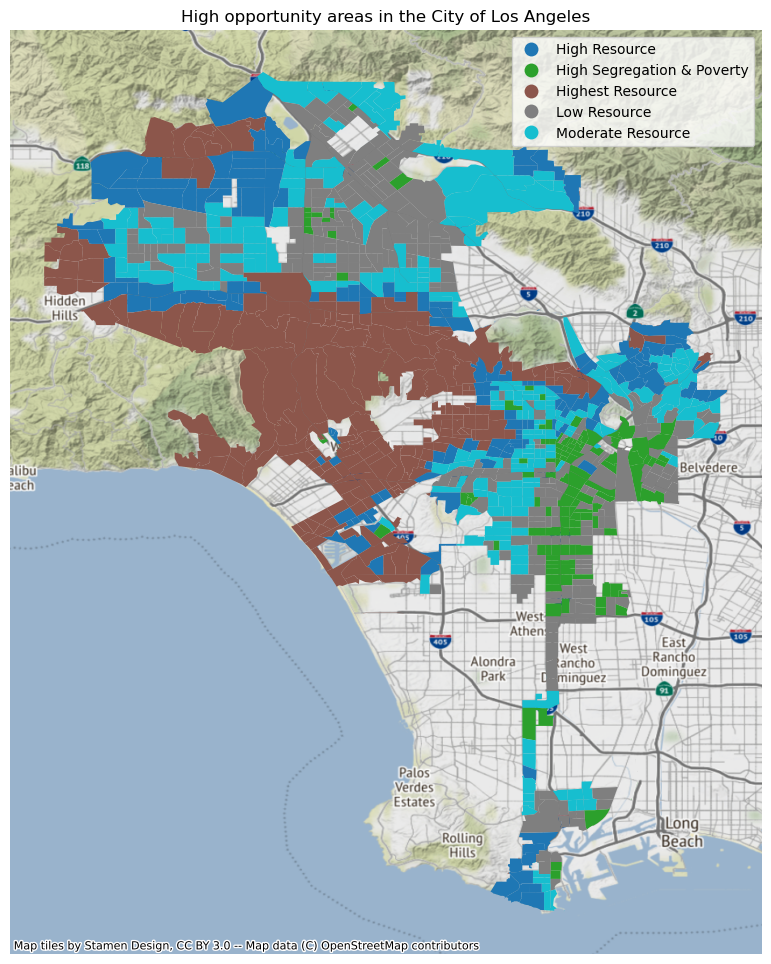

In [30]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
citytracts.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('High opportunity areas in the City of Los Angeles')

# add a basemap
ctx.add_basemap(ax, crs=4326) 

In [31]:
citytracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
#finding unique values in the oppcat column
citytracts.oppcat.unique()

array(['Moderate Resource', 'High Resource', 'Low Resource',
       'High Segregation & Poverty', 'Highest Resource', None],
      dtype=object)

In [33]:
#assigning colors to each oppcat category and creating a color column
citytracts.loc[citytracts['oppcat'] == 'Highest Resource', 'color'] = '#66AAE6'
citytracts.loc[citytracts['oppcat'] == 'High Resource', 'color'] = '#66AAE6'
citytracts.loc[citytracts['oppcat'] == 'Moderate Resource', 'color'] = '#FFFFFF'
citytracts.loc[citytracts['oppcat'] == 'Low Resource', 'color'] = '#FFFFFF'
citytracts.loc[citytracts['oppcat'] == 'High Segregation & Poverty', 'color'] = '#FFFFFF'

In [34]:
citytracts.sample(10)

OBJECTID CITY         fips      cnty_nm                      oppcat  \
271         1   IN  06037134002  Los Angeles                Low Resource   
886         1   IN  06037271100  Los Angeles            Highest Resource   
959         1   IN  06037294610  Los Angeles           Moderate Resource   
952         1   IN  06037294200  Los Angeles           Moderate Resource   
590         1   IN  06037211803  Los Angeles           Moderate Resource   
452         1   IN  06037192620  Los Angeles                Low Resource   
931         1   IN  06037277100  Los Angeles               High Resource   
342         1   IN  06037143300  Los Angeles            Highest Resource   
81          1   IN  06037111206  Los Angeles               High Resource   
725         1   IN  06037231100  Los Angeles  High Segregation & Poverty   

                                              geometry    color  
271  POLYGON ((-118.58845 34.19524, -118.58846 34.2...  #FFFFFF  
886  POLYGON ((-118.42002 34.03564, -118.41759 34.0...  #66AAE6  
959  POLYGON ((-118.25518 33.78308, -118.25957 33.7...  #FFFFFF  
952  POLYGON ((-118.27034 33.79884, -118.26675 33.7...  #FFFFFF  
590  POLYGON ((-118.30036 34.06538, -118.30285 34.0...  #FFFFFF  
452  POLYGON ((-118.29656 34.07631, -118.29751 34.0...  #FFFFFF  
931  POLYGON ((-118.37014 33.96830, -118.37027 33.9...  #66AAE6  
342  POLYGON ((-118.37924 34.15733, -118.37915 34.1...  #66AAE6  
81   POLYGON ((-118.53610 34.25727, -118.54124 34.2...  #66AAE6  
725  POLYGON ((-118.28275 34.01566, -118.28249 34.0...  #FFFFFF

In [35]:
citytracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  1152 non-null   int64   
 1   CITY      1152 non-null   object  
 2   fips      1152 non-null   object  
 3   cnty_nm   1152 non-null   object  
 4   oppcat    1124 non-null   object  
 5   geometry  1152 non-null   geometry
 6   color     1124 non-null   object  
dtypes: geometry(1), int64(1), object(5)
memory usage: 63.1+ KB


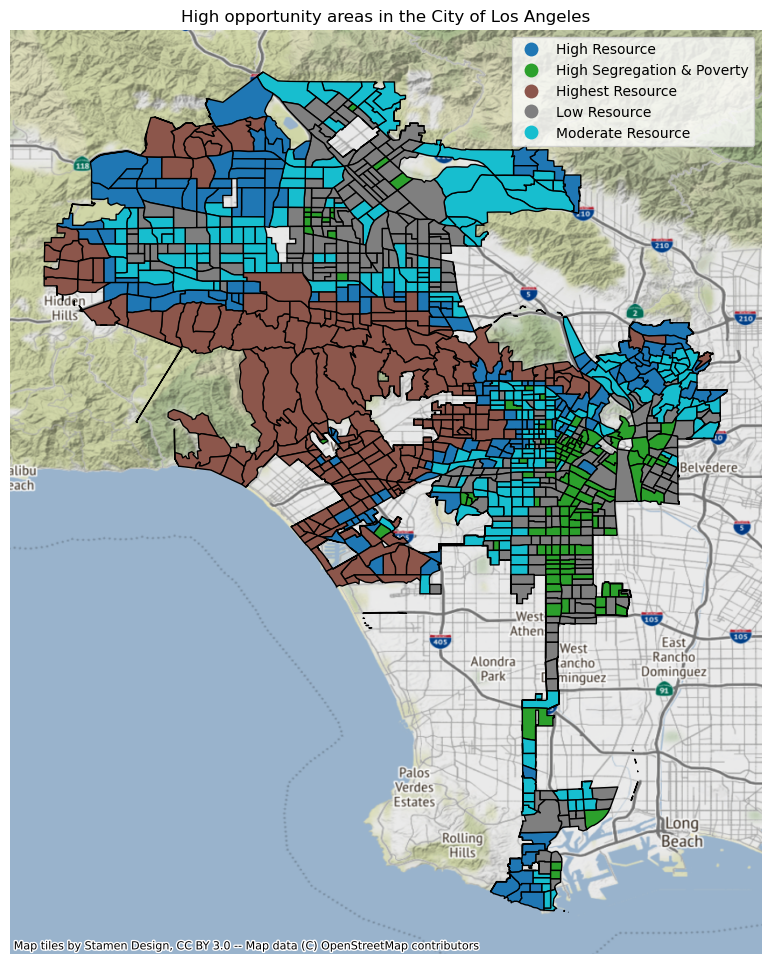

In [36]:
#plotting with assigned colours
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
citytracts.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            
            edgecolor = 'black',
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
          
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('High opportunity areas in the City of Los Angeles')

# add a basemap
ctx.add_basemap(ax, crs=4326)

In [37]:
#keeping only high and highest resource census tracts
citytracts.loc[citytracts['oppcat'].isin(['High Resource','Highest Resource'])]

OBJECTID CITY         fips      cnty_nm            oppcat  \
1            1   IN  06037101122  Los Angeles     High Resource   
4            1   IN  06037101300  Los Angeles     High Resource   
10           1   IN  06037103101  Los Angeles     High Resource   
11           1   IN  06037103102  Los Angeles     High Resource   
49           1   IN  06037106603  Los Angeles     High Resource   
...        ...  ...          ...          ...               ...   
1126         1   IN  06037800506  Los Angeles  Highest Resource   
1127         1   IN  06037920303  Los Angeles  Highest Resource   
1128         1   IN  06037920312  Los Angeles     High Resource   
1130         1   IN  06037930200  Los Angeles  Highest Resource   
1146         1   IN  06037980024  Los Angeles  Highest Resource   

                                               geometry    color  
1     POLYGON ((-118.27742 34.25990, -118.27817 34.2...  #66AAE6  
4     POLYGON ((-118.26528 34.25238, -118.26530 34.2...  #66AAE6  
10    POLYGON ((-118.29975 34.27671, -118.29970 34.2...  #66AAE6  
11    POLYGON ((-118.31573 34.26697, -118.31400 34.2...  #66AAE6  
49    POLYGON ((-118.54083 34.29882, -118.54157 34.3...  #66AAE6  
...                                                 ...      ...  
1126  MULTIPOLYGON (((-118.56715 34.04141, -118.5671...  #66AAE6  
1127  MULTIPOLYGON (((-118.54671 34.29787, -118.5409...  #66AAE6  
1128  POLYGON ((-118.50820 34.33401, -118.50789 34.3...  #66AAE6  
1130  MULTIPOLYGON (((-118.38289 34.29696, -118.3828...  #66AAE6  
1146  POLYGON ((-118.46793 34.17625, -118.46754 34.1...  #66AAE6  

[428 rows x 7 columns]

In [38]:
TCAC_trimmed = citytracts.loc[citytracts['oppcat'].isin(['High Resource','Highest Resource'])].copy()
TCAC_trimmed.sample(5)

OBJECTID CITY         fips      cnty_nm            oppcat  \
385         1   IN  06037186302  Los Angeles     High Resource   
342         1   IN  06037143300  Los Angeles  Highest Resource   
283         1   IN  06037134423  Los Angeles     High Resource   
916         1   IN  06037275200  Los Angeles     High Resource   
832         1   IN  06037262501  Los Angeles  Highest Resource   

                                              geometry    color  
385  POLYGON ((-118.22706 34.11862, -118.22481 34.1...  #66AAE6  
342  POLYGON ((-118.37924 34.15733, -118.37915 34.1...  #66AAE6  
283  POLYGON ((-118.62350 34.20825, -118.62780 34.2...  #66AAE6  
916  POLYGON ((-118.42198 33.99726, -118.42029 33.9...  #66AAE6  
832  POLYGON ((-118.52648 34.04791, -118.52689 34.0...  #66AAE6

In [39]:
#trying out a new command but didnt really work
citytracts['color_try'] = citytracts.index.map(lambda oppcat : 'blue' if 'oppcat' == 'High Resource' else 'white')
citytracts.explore(column='color_try', cmap=['blue', 'white'], legend=True)

In [40]:
# converting the data to a neighborhood scale
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [41]:
#seeing the neighborhoods data
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  114 non-null    int64   
 1   name      114 non-null    object  
 2   geometry  114 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.8+ KB


In [42]:
neighborhoods.head()

OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...

In [43]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
#since they are in the same coordinate system, lets do a spatial join
TCAC_by_neighborhoods = gpd.sjoin(neighborhoods, citytracts) #Spatial join polygons to polygons
TCAC_by_neighborhoods.head()

OBJECTID_left             name  \
0               1  Adams-Normandie   
0               1  Adams-Normandie   
31             32  Exposition Park   
51             52   Jefferson Park   
0               1  Adams-Normandie   

                                             geometry  index_right  \
0   POLYGON ((-118.30069 34.03731, -118.30388 34.0...          686   
0   POLYGON ((-118.30069 34.03731, -118.30388 34.0...          684   
31  POLYGON ((-118.29155 34.01837, -118.28294 34.0...          684   
51  POLYGON ((-118.31335 34.03721, -118.30900 34.0...          684   
0   POLYGON ((-118.30069 34.03731, -118.30388 34.0...          683   

    OBJECTID_right CITY         fips      cnty_nm             oppcat    color  \
0                1   IN  06037222100  Los Angeles  Moderate Resource  #FFFFFF   
0                1   IN  06037222001  Los Angeles  Moderate Resource  #FFFFFF   
31               1   IN  06037222001  Los Angeles  Moderate Resource  #FFFFFF   
51               1   IN  06037222001  Los Angeles  Moderate Resource  #FFFFFF   
0                1   IN  06037221900  Los Angeles       Low Resource  #FFFFFF   

   color_try  
0      white  
0      white  
31     white  
51     white  
0      white

In [45]:
print(ctx.providers.MapBox.keys())

dict_keys(['url', 'html_attribution', 'attribution', 'tileSize', 'max_zoom', 'zoomOffset', 'id', 'accessToken', 'name'])


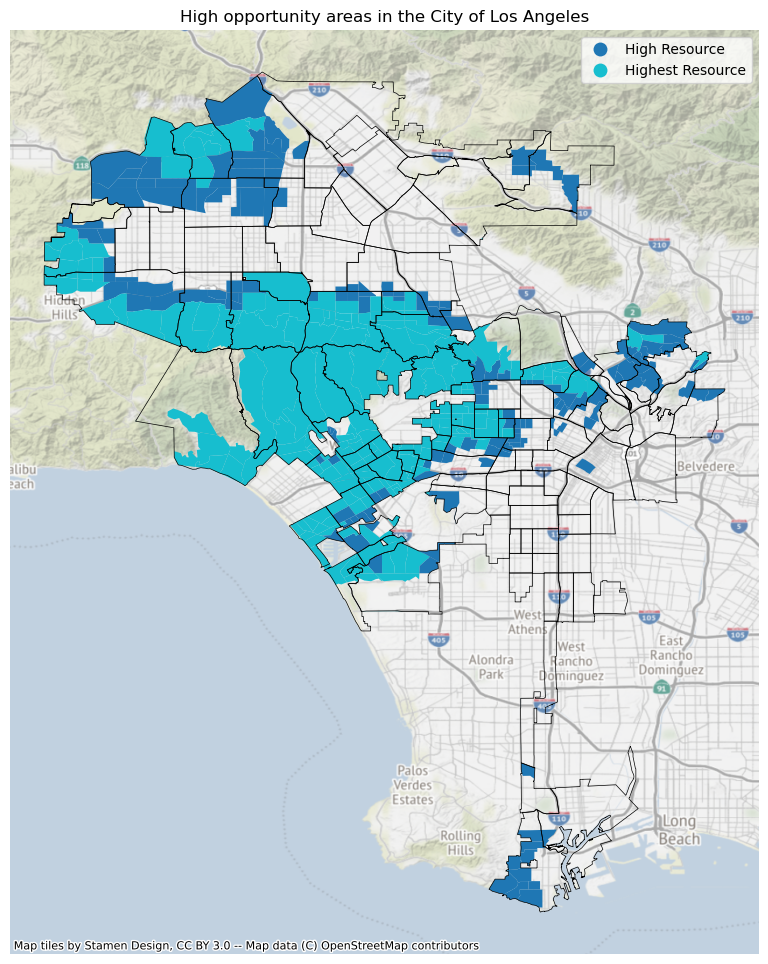

In [46]:
#plotting with neighborhood boundaries
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )
          
    
    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('High opportunity areas in the City of Los Angeles')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.60)

In [47]:
#importing building permit data to then filter projects built in the last 5 years
newunits = pd.read_csv ("data/Building_Permits__New_Housing_Units.csv")

/tmp/ipykernel_803/3093865576.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  newunits = pd.read_csv ("data/Building_Permits__New_Housing_Units.csv")


In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
newunits.head()

Assessor Book Assessor Page Assessor Parcel  \
0         4211.0            27               6   
1         5420.0            15              20   
2         2673.0             6              45   
3         4362.0             3              43   
4         2673.0             6              49   

                                               Tract Block Lot  \
0                                      TR 49104-06-C   NaN  19   
1  BLOCKS NO'S. 11, 12, 13, 14, 15, 16, 17, 18, 1...    21  18   
2                                           TR 74704   NaN   1   
3                                            TR 7656     6   9   
4                                           TR 74704   NaN   5   

  Reference # (Old Permit #)      PCIS Permit #    Permit Type  \
0                  19WL99310  19010-30000-00548       Bldg-New   
1                  21LA01334  19010-10000-06113       Bldg-New   
2                  21ON 2734  18010-20000-01399       Bldg-New   
3                  17VN34261  14010-10001-03040  Bldg-Addition   
4                  21ON 2735  18010-20000-01403       Bldg-New   

          Permit Sub-Type Permit Category  Project Number  Event Code  \
0  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
1  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
2  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
3  1 or 2 Family Dwelling      Plan Check             NaN         NaN   
4  1 or 2 Family Dwelling      Plan Check             NaN         NaN   

  Initiating Office Issue Date  Address Start Address Fraction Start  \
0           WEST LA  5/31/2019           6500                    NaN   
1             METRO  9/30/2021           1950                    NaN   
2          VAN NUYS  1/22/2021          15827                    NaN   
3             METRO   2/1/2017            627                    NaN   
4          VAN NUYS  1/22/2021          15803                    NaN   

   Address End Address Fraction End Street Direction  Street Name  \
0         6500                  NaN                S     SEABLUFF   
1         1950                  NaN                N       VESTAL   
2        15827                  NaN                W         NAPA   
3          627                  NaN                N  CARCASSONNE   
4        15803                  NaN                W         NAPA   

  Street Suffix Suffix Direction Unit Range Start Unit Range End  Zip Code  \
0            DR              NaN              NaN            NaN   90094.0   
1           AVE              NaN              NaN            NaN   90026.0   
2            ST              NaN              NaN            NaN   91343.0   
3          ROAD              NaN              NaN            NaN   90077.0   
4            ST              NaN              NaN            NaN   91343.0   

                                    Work Description  Valuation  \
0  Three story single family dwelling with attcah...   401000.0   
1  NEW 3-STORY SINGLE FAMILY RESIDENCE - 2389 SQF...   298625.0   
2  NEW 34'-0" x 47'-4" TWO-STORY SINGLE FAMILY DW...   260000.0   
3  1.) SUPPLEMENTAL TO 14010-30000-03040 FOR CHAN...   500000.0   
4  NEW 34'-0" x 47'-6" TWO-STORY SINGLE FAMILY DW...   260000.0   

   Floor Area-L.A. Zoning Code Definition  # of Residential Dwelling Units  \
0                                  3664.0                                1   
1                                  2389.0                                1   
2                                  2217.0                                1   
3                                 20381.0                                1   
4                                  2217.0                                1   

   # of Stories Contractor's Business Name    Contractor Address  \
0           3.0              OWNER-BUILDER                   NaN   
1           3.0       TOSTY'S CONSTRUCTION  3455 CATTARAUGUS AVE   
2           2.0              OWNER-BUILDER                   NaN   
3       

In [49]:
newunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Assessor Book                             25029 non-null  float64
 1   Assessor Page                             25029 non-null  object 
 2   Assessor Parcel                           25029 non-null  object 
 3   Tract                                     24956 non-null  object 
 4   Block                                     5435 non-null   object 
 5   Lot                                       24953 non-null  object 
 6   Reference # (Old Permit #)                25049 non-null  object 
 7   PCIS Permit #                             25062 non-null  object 
 8   Permit Type                               25062 non-null  object 
 9   Permit Sub-Type                           25062 non-null  object 
 10  Permit Category                   

In [50]:
# seeing which columns have a zero value
newunits.columns[newunits.isna().all()].tolist()

['Event Code']

In [51]:
# drop all columns with 0 values
newunits = newunits.dropna(axis=1,how='all')

In [52]:
newunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Assessor Book                             25029 non-null  float64
 1   Assessor Page                             25029 non-null  object 
 2   Assessor Parcel                           25029 non-null  object 
 3   Tract                                     24956 non-null  object 
 4   Block                                     5435 non-null   object 
 5   Lot                                       24953 non-null  object 
 6   Reference # (Old Permit #)                25049 non-null  object 
 7   PCIS Permit #                             25062 non-null  object 
 8   Permit Type                               25062 non-null  object 
 9   Permit Sub-Type                           25062 non-null  object 
 10  Permit Category                   

In [53]:
#checking the type of permits given 
newunits['Permit Type'].value_counts()

Bldg-New             22551
Bldg-Alter/Repair     1472
Bldg-Addition         1011
Fire Sprinkler           7
Nonbldg-New              6
Bldg-Relocation          5
Plumbing                 4
Grading                  2
Bldg-Demolition          1
Electrical               1
Elevator                 1
HVAC                     1
Name: Permit Type, dtype: int64

In [54]:
#how to rename column
newunits.rename(columns={'Latitude/Longitude':'LatLong'}, inplace=True)

In [55]:
newunits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Assessor Book                             25029 non-null  float64
 1   Assessor Page                             25029 non-null  object 
 2   Assessor Parcel                           25029 non-null  object 
 3   Tract                                     24956 non-null  object 
 4   Block                                     5435 non-null   object 
 5   Lot                                       24953 non-null  object 
 6   Reference # (Old Permit #)                25049 non-null  object 
 7   PCIS Permit #                             25062 non-null  object 
 8   Permit Type                               25062 non-null  object 
 9   Permit Sub-Type                           25062 non-null  object 
 10  Permit Category                   

In [56]:
#showing a subset of columns required for analysis
newunits[['Tract','Permit Type','Permit Sub-Type','Issue Date','# of Residential Dwelling Units','Zone','Census Tract','Latitude','Longitude']].head()

Tract    Permit Type  \
0                                      TR 49104-06-C       Bldg-New   
1  BLOCKS NO'S. 11, 12, 13, 14, 15, 16, 17, 18, 1...       Bldg-New   
2                                           TR 74704       Bldg-New   
3                                            TR 7656  Bldg-Addition   
4                                           TR 74704       Bldg-New   

          Permit Sub-Type Issue Date  # of Residential Dwelling Units  \
0  1 or 2 Family Dwelling  5/31/2019                                1   
1  1 or 2 Family Dwelling  9/30/2021                                1   
2  1 or 2 Family Dwelling  1/22/2021                                1   
3  1 or 2 Family Dwelling   2/1/2017                                1   
4  1 or 2 Family Dwelling  1/22/2021                                1   

         Zone  Census Tract  Latitude  Longitude  
0      R4(PV)       2756.02  33.97210 -118.42177  
1     RD2-1VL       1974.10  34.08801 -118.25256  
2  (T)(Q)R1-1       1174.04  34.22664 -118.47725  
3    RE40-1-H       2621.00       NaN        NaN  
4  (T)(Q)R1-1       1174.04  34.22664 -118.47668

In [57]:
#creating  new dataset with trimmed columns
newunits_trimmed = newunits[['Tract','Permit Type','Permit Sub-Type','Issue Date','# of Residential Dwelling Units','Zone','Census Tract','Latitude','Longitude']]
newunits_trimmed.head()

Tract    Permit Type  \
0                                      TR 49104-06-C       Bldg-New   
1  BLOCKS NO'S. 11, 12, 13, 14, 15, 16, 17, 18, 1...       Bldg-New   
2                                           TR 74704       Bldg-New   
3                                            TR 7656  Bldg-Addition   
4                                           TR 74704       Bldg-New   

          Permit Sub-Type Issue Date  # of Residential Dwelling Units  \
0  1 or 2 Family Dwelling  5/31/2019                                1   
1  1 or 2 Family Dwelling  9/30/2021                                1   
2  1 or 2 Family Dwelling  1/22/2021                                1   
3  1 or 2 Family Dwelling   2/1/2017                                1   
4  1 or 2 Family Dwelling  1/22/2021                                1   

         Zone  Census Tract  Latitude  Longitude  
0      R4(PV)       2756.02  33.97210 -118.42177  
1     RD2-1VL       1974.10  34.08801 -118.25256  
2  (T)(Q)R1-1       1174.04  34.22664 -118.47725  
3    RE40-1-H       2621.00       NaN        NaN  
4  (T)(Q)R1-1       1174.04  34.22664 -118.47668

In [58]:
#seeing the trimmed dataset
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25062 entries, 0 to 25061
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tract                            24956 non-null  object 
 1   Permit Type                      25062 non-null  object 
 2   Permit Sub-Type                  25062 non-null  object 
 3   Issue Date                       25062 non-null  object 
 4   # of Residential Dwelling Units  25062 non-null  int64  
 5   Zone                             25031 non-null  object 
 6   Census Tract                     25060 non-null  float64
 7   Latitude                         19701 non-null  float64
 8   Longitude                        19701 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB


In [59]:
#removing all the rows with missing data (NaN)
newunits_trimmed.dropna(subset=['Latitude'], how='all', inplace=True)

/tmp/ipykernel_803/2961966266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed.dropna(subset=['Latitude'], how='all', inplace=True)


In [60]:
#checking the dataset again
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tract                            19636 non-null  object 
 1   Permit Type                      19701 non-null  object 
 2   Permit Sub-Type                  19701 non-null  object 
 3   Issue Date                       19701 non-null  object 
 4   # of Residential Dwelling Units  19701 non-null  int64  
 5   Zone                             19675 non-null  object 
 6   Census Tract                     19699 non-null  float64
 7   Latitude                         19701 non-null  float64
 8   Longitude                        19701 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ MB


In [61]:
newunits_trimmed.sample(5)

Tract Permit Type  \
21514  T. WIESENDANGER'S FIGUEROA PARK TRACT    Bldg-New   
8176                                 TR 5588    Bldg-New   
12993                                  71871    Bldg-New   
245                                  TR 9300    Bldg-New   
4306                                 TR 3295    Bldg-New   

              Permit Sub-Type  Issue Date  # of Residential Dwelling Units  \
21514  1 or 2 Family Dwelling    4/9/2013                                2   
8176   1 or 2 Family Dwelling   6/16/2021                                1   
12993  1 or 2 Family Dwelling    5/5/2014                                1   
245    1 or 2 Family Dwelling  10/10/2017                                1   
4306   1 or 2 Family Dwelling   4/19/2016                                1   

           Zone  Census Tract  Latitude  Longitude  
21514      R2-1       2327.00  33.99133 -118.28642  
8176   R1-1-RIO       1434.00  34.15166 -118.41091  
12993      C2-1       1924.20  34.08305 -118.31179  
245        R1-1       2626.04  34.04939 -118.53777  
4306     R2-1XL       2965.00  33.74773 -118.29841

In [62]:
#importing shapely files to convert LatLng into a geometry points
from geopandas import GeoDataFrame
from shapely.geometry import Point 
# Shapely for converting latitude/longtitude to geometry

In [63]:
# convert lat/lon's to floats
newunits_trimmed['Latitude'] = newunits_trimmed['Latitude'].astype(float)
newunits_trimmed['Longitude'] = newunits_trimmed['Longitude'].astype(float)
newunits_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tract                            19636 non-null  object 
 1   Permit Type                      19701 non-null  object 
 2   Permit Sub-Type                  19701 non-null  object 
 3   Issue Date                       19701 non-null  object 
 4   # of Residential Dwelling Units  19701 non-null  int64  
 5   Zone                             19675 non-null  object 
 6   Census Tract                     19699 non-null  float64
 7   Latitude                         19701 non-null  float64
 8   Longitude                        19701 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ MB


/tmp/ipykernel_803/2321521952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed['Latitude'] = newunits_trimmed['Latitude'].astype(float)
/tmp/ipykernel_803/2321521952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newunits_trimmed['Longitude'] = newunits_trimmed['Longitude'].astype(float)


In [66]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf_newunits = gpd.GeoDataFrame(newunits_trimmed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(newunits_trimmed.Longitude, newunits_trimmed.Latitude))

In [67]:
gdf_newunits.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19701 entries, 0 to 25061
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Tract                            19636 non-null  object  
 1   Permit Type                      19701 non-null  object  
 2   Permit Sub-Type                  19701 non-null  object  
 3   Issue Date                       19701 non-null  object  
 4   # of Residential Dwelling Units  19701 non-null  int64   
 5   Zone                             19675 non-null  object  
 6   Census Tract                     19699 non-null  float64 
 7   Latitude                         19701 non-null  float64 
 8   Longitude                        19701 non-null  float64 
 9   geometry                         19701 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 1.7+ MB


In [68]:
gdf_newunits.sample(5)

Tract    Permit Type         Permit Sub-Type  \
7381        JEFFRIES AVENUE TRACT       Bldg-New  1 or 2 Family Dwelling   
24829  WILSHIRE BOULEVARD HEIGHTS  Bldg-Addition               Apartment   
17559                     TR 2955       Bldg-New  1 or 2 Family Dwelling   
21525      DALY AND METTLER TRACT       Bldg-New  1 or 2 Family Dwelling   
7418                      TR 3634       Bldg-New  1 or 2 Family Dwelling   

      Issue Date  # of Residential Dwelling Units           Zone  \
7381    4/6/2018                                1  RD2-1-CDO-RIO   
24829  4/25/2017                              120           C4-2   
17559  1/11/2022                                1           R1-1   
21525   1/9/2015                                2           R2-1   
7418   9/17/2021                                1         R2-1VL   

       Census Tract  Latitude  Longitude                     geometry  
7381        1853.20  34.08690 -118.22338  POINT (-118.22338 34.08690)  
24829       2123.04  34.06047 -118.29555  POINT (-118.29555 34.06047)  
17559       1414.00  34.15504 -118.48344  POINT (-118.48344 34.15504)  
21525       2284.10  34.01225 -118.27043  POINT (-118.27043 34.01225)  
7418        1973.00  34.08077 -118.25276  POINT (-118.25276 34.08077)

<AxesSubplot: >

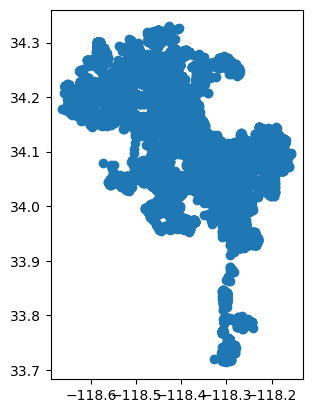

In [69]:
gdf_newunits.plot()

<AxesSubplot: >

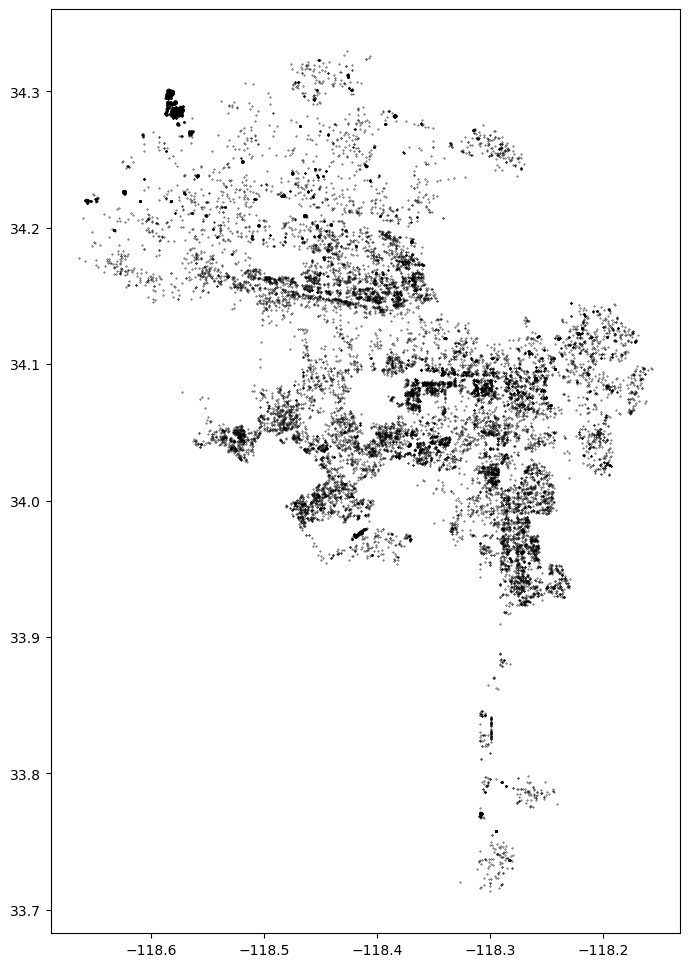

In [75]:
#making a prettier plot
gdf_newunits.plot(
            figsize=(20,12),   
            markersize = 0.1, 
            color = 'black',
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

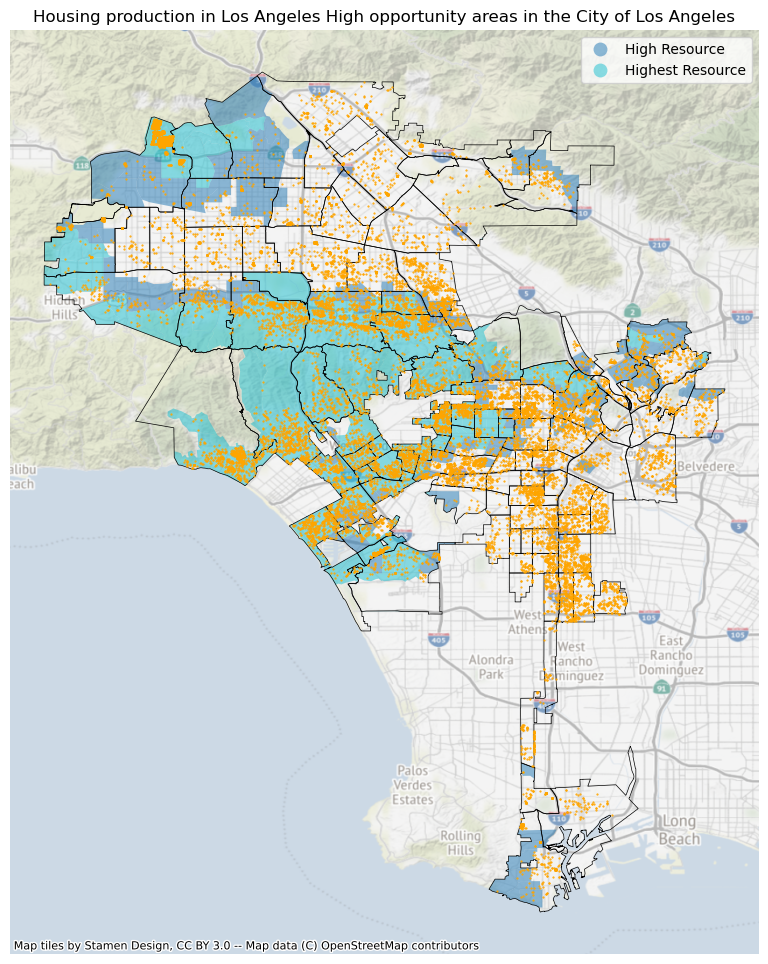

In [88]:
#now trying to map it all together
#plotting with neighborhood boundaries
#starting the plot
fig, ax = plt.subplots(figsize=(20,12))



#adding colour to the plot
TCAC_trimmed.plot(
            ax=ax,   
            column = 'oppcat',   # column that defines the color of the dots
            legend = True,     # add a legend        
            alpha = 0.5,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
            }
        
            )
neighborhoods.plot(
            ax=ax,                
            color = "none",        
            edgecolor = 'black',
            linewidth = 0.5,
            )
          
gdf_newunits.plot(
            ax=ax,   
            markersize = 0.3, 
            color = 'orange',
            legend = True,     # add a legend 
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
                'labels':'Housing units',
            }                  # this puts the legend to the side
) 
    
# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Housing production in Los Angeles High opportunity areas in the City of Los Angeles')

# add a basemap at 40% transparency
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Stamen.Terrain, alpha=0.5)



In [ ]:
#this didnt work out, ask TA or Yoh
#selecting only units built in the last 5 years
start_date = '12/31/2017'
end_date = '12/31/2022'
# Select DataFrame rows between two dates
mask = (newunits_trimmed['Issue Date'] > start_date) & (newunits_trimmed['Issue Date'] <= end_date)
newunits_date = newunits_trimmed.loc[mask]
newunits_date.head()

In [ ]:
newunits_date.info()

In [ ]:
#converting to a geodata frame
# convert df to gdf
# since data is in lat/lon's, assigning the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(newunits_date, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(newunits_date.LatLong))

In [ ]:
# plotting new units_date dataset to check
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
newunits_date.plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)